In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [4]:
#read dataset
data=pd.read_csv("./heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#understand features 


#age - in years
#sex - (1 = male; 0 = female)
#cp - chest pain type
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#chol - serum cholestoral in mg/dl
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#target - 1 or 0

In [6]:
data.isnull().values.any()

False

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


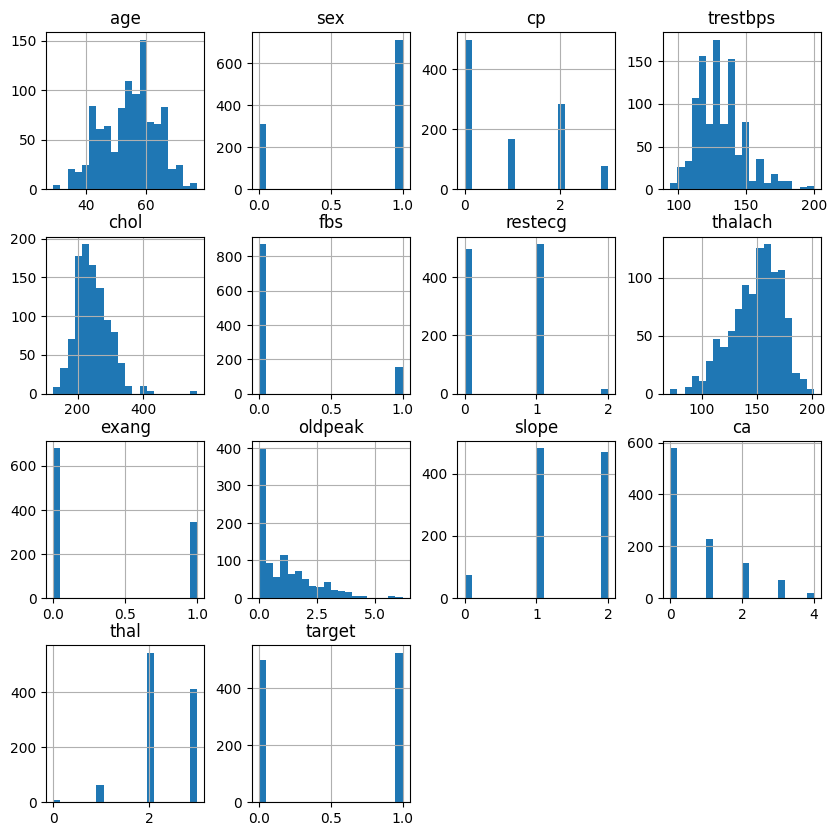

In [9]:
#histogram
data.hist(bins=20,figsize=(10,10))
plt.show()

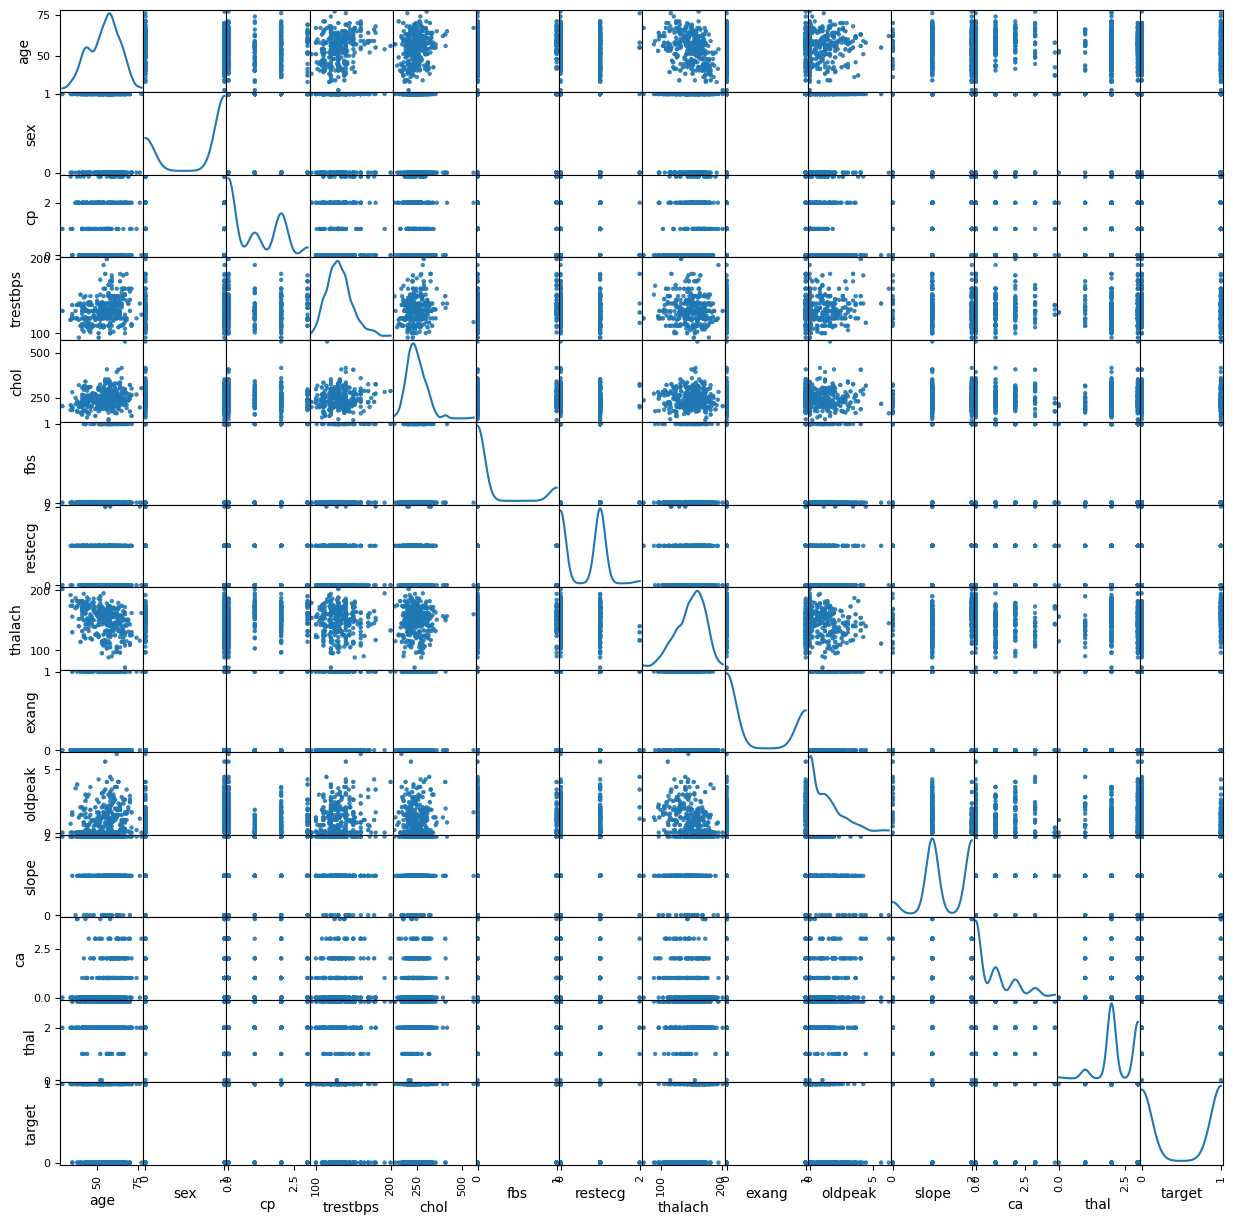

In [10]:
#scatter matrix
pd.plotting.scatter_matrix(data,figsize=(15,15),diagonal ='kde')
plt.show()

<Axes: >

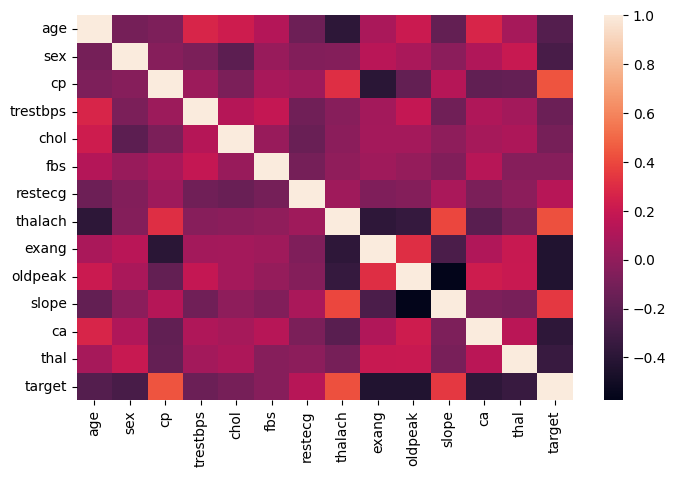

In [11]:
#correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(data.corr())

#In plot we can see there is higher correlation between target and cp (chest pain) ,target and thalach (heart rate)
#some attributes are independent to each other also as there is near 0 correlation

<Axes: >

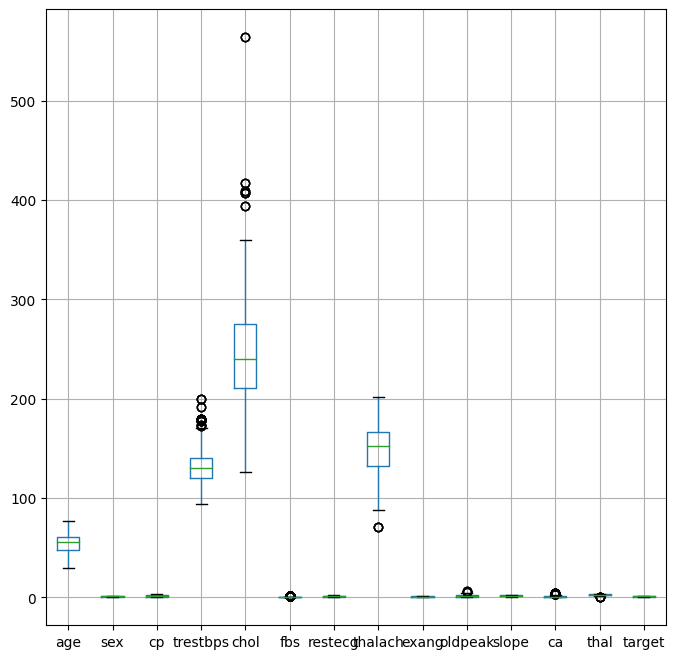

In [12]:
#box plot to see any outlier

data.boxplot(figsize=(8,8))
#we can clearly see our several varibles have outlier which will reduce the performance

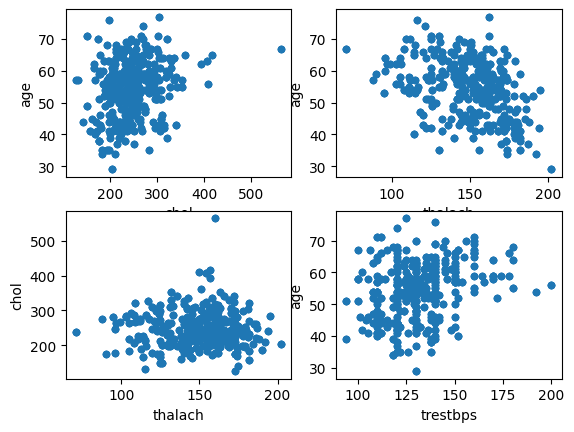

In [13]:
ax=plt.subplot(2,2,1)
data.plot(kind='scatter',y='age',x='chol',ax=ax)
#major of the data are within the 200-300
#We found one outlier the chol is more than 500

ax=plt.subplot(2,2,2)
data.plot(kind='scatter',y='age',x='thalach',ax=ax)

ax=plt.subplot(2,2,3)
data.plot(kind='scatter',y='chol',x='thalach',ax=ax)

ax=plt.subplot(2,2,4)
data.plot(kind='scatter',y='age',x='trestbps',ax=ax)
plt.show()

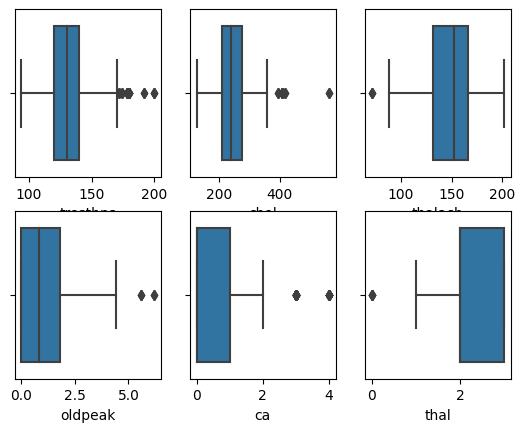

In [14]:
#each attribute outlier closer look
ax=plt.subplot(2,3,1)
sns.boxplot(x=data['trestbps'])

ax=plt.subplot(2,3,2)
sns.boxplot(x=data['chol'])

ax=plt.subplot(2,3,3)
sns.boxplot(x=data['thalach'])

ax=plt.subplot(2,3,4)
sns.boxplot(x=data['oldpeak'])

ax=plt.subplot(2,3,5)
sns.boxplot(x=data['ca'])

ax=plt.subplot(2,3,6)
sns.boxplot(x=data['thal'])

plt.show()

In [15]:
#outlier remove process...
#IQR inter quartile range

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

print((data < (Q1 - 1.5 * IQR))|(data > (Q3 + 1.5 * IQR)))


age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64
        age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang   
0     False  False  False     False  False  False    False    False  False  \
1     False  False  False     False  False   True    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False   True    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
1020  False  False  False     False  False  False    False    False  False   
1021  False  False  False     False  False  False    False    False  False   
1022  False  False  False     False  False  F

In [16]:
#
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape
#more than 80 records deleted

((1025, 14), (769, 14))

In [17]:
#extract feature and target
X=data_out.drop(columns=['target'])
y=data_out['target']

In [18]:
#split the dataset into train and test 10%
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((653, 13), (116, 13), (653,), (116,))

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.7931034482758621
ROC AUC score 0.7916666666666666


C:\Users\Thuong Nguyen\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#Support Vector Machine Classifier
from sklearn.svm import SVC

clf=SVC(kernel='linear',gamma='scale')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.8017241379310345
ROC AUC score 0.8005952380952381


In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=60)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 1.0
ROC AUC score 1.0


In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.6293103448275862
ROC AUC score 0.6255952380952381


In [24]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 1.0
ROC AUC score 1.0


In [25]:
#Naivye Bayes

from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.7931034482758621
ROC AUC score 0.7922619047619046


In [ ]:
## Gaussian NB gives the accuracy more than 94%